In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
df = pd.read_csv("H1.csv")

df.head()


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,342,2015,July,27,1,0,0,2,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,0,737,2015,July,27,1,0,0,2,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,0,7,2015,July,27,1,0,1,1,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,0,13,2015,July,27,1,0,1,1,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,0,14,2015,July,27,1,0,2,2,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [44]:
def convert_single(x,categorical_index):
    try:
        return categorical_index.index(x)
    except Exception as e:
        return -1
def convert_to_cat(df: pd.DataFrame,categorical_index: dict = None) :
    if categorical_index is None:
        categorical_index={}
        for c, type in zip(df.columns,df.dtypes):
            if type == object:
                df[c]=pd.Categorical(df[c])
                categorical_index[c]=list(df[c].cat.categories)
                df[c]=df[c].cat.codes
    else:
        for c, type in zip(df.colums,df.dtypes):
            if type == object:
                df[c]=df[c].map(lambda x: convert_single(x, categorical_index[c]))


    return df,categorical_index
    

In [45]:
train_df,categorical_index=convert_to_cat(df)

In [46]:
print(train_df)

       IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  \
0               0       342             2015                 5   
1               0       737             2015                 5   
2               0         7             2015                 5   
3               0        13             2015                 5   
4               0        14             2015                 5   
...           ...       ...              ...               ...   
40055           0       212             2017                 1   
40056           0       169             2017                 1   
40057           0       204             2017                 1   
40058           0       211             2017                 1   
40059           0       161             2017                 1   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1                     0   
1                         27                      1  

In [6]:
# normalized_dataset_train = (np.array(train_df) - min(np.array(train_df))) / (max(np.array(train_df)) - min(np.array(train_df)))


In [47]:
import tensorflow
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [48]:
train_df.shape


(40060, 28)

shuffle

In [50]:
train_df=train_df.sample(frac=1)
print(train_df)

       IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  \
21657           0        55             2017                 6   
23853           0         3             2016                 8   
25628           0       206             2016                 6   
25506           0       170             2016                 6   
26188           0       169             2016                 5   
...           ...       ...              ...               ...   
16997           0       239             2015                11   
37600           0        57             2017                 6   
38010           0       270             2017                 6   
37994           0        57             2017                 5   
3366            1        45             2015                 2   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
21657                     25                     23                     2   
23853                     19                      1  

split

In [51]:

pd.DataFrame(train_df).iloc[:,24]

21657    163.25
23853     42.00
25628     88.20
25506     91.80
26188    173.67
          ...  
16997     80.00
37600    248.00
38010    112.80
37994    264.00
3366      68.00
Name: ADR, Length: 40060, dtype: float64

In [52]:
final_x_1=pd.DataFrame(train_df).iloc[:,:24]
final_x_2=(pd.DataFrame(train_df).iloc[:,25:])
final_x=pd.concat([final_x_1, final_x_2], axis="columns")
final_y=pd.DataFrame(train_df).iloc[:,24]
print(final_x)
# final_x=final_x.T.sample(random_state=1)
# print(final_x.T)


       IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  \
21657           0        55             2017                 6   
23853           0         3             2016                 8   
25628           0       206             2016                 6   
25506           0       170             2016                 6   
26188           0       169             2016                 5   
...           ...       ...              ...               ...   
16997           0       239             2015                11   
37600           0        57             2017                 6   
38010           0       270             2017                 6   
37994           0        57             2017                 5   
3366            1        45             2015                 2   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
21657                     25                     23                     2   
23853                     19                      1  

In [11]:
# print(final_x.loc[:,1])

In [53]:
mean=final_x.mean()
standard_deviation=final_x.std()
final_x= (final_x - mean) / standard_deviation
print(final_x)

       IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  \
21657   -0.619943 -0.387270         1.216254          0.195751   
23853   -0.619943 -0.921780        -0.168123          0.766915   
25628   -0.619943  1.164866        -0.168123          0.195751   
25506   -0.619943  0.794820        -0.168123          0.195751   
26188   -0.619943  0.784541        -0.168123         -0.089831   
...           ...       ...              ...               ...   
16997   -0.619943  1.504074        -1.552499          1.623662   
37600   -0.619943 -0.366712         1.216254          0.195751   
38010   -0.619943  1.822724         1.216254          0.195751   
37994   -0.619943 -0.366712         1.216254         -0.089831   
3366     1.613011 -0.490060        -1.552499         -0.946577   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
21657              -0.152859               0.808081              0.705851   
23853              -0.581264              -1.668362  

In [54]:
print(final_y)

21657    163.25
23853     42.00
25628     88.20
25506     91.80
26188    173.67
          ...  
16997     80.00
37600    248.00
38010    112.80
37994    264.00
3366      68.00
Name: ADR, Length: 40060, dtype: float64


In [55]:
final_x.shape

(40060, 27)

In [56]:
# final_x=np.reshape(final_x, (40060,(1,27)) )
# input_shape = (final_x.shape[0],final_x.shape[1])
input_shape = (final_x.shape[1],)


print(f'Feature shape: {input_shape}')


Feature shape: (27,)


In [76]:
model = keras.models.Sequential()
# model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(64, input_shape=input_shape, activation='relu'))

# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))

# model.add(Dense(1, activation='softmax'))
model.add(Dense(1))

# Configure the model and start training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    loss='mean_squared_error',
                    metrics=['MAE'])
history_1=model.fit((final_x), final_y, epochs=30, batch_size=64, verbose=1)
history_2=model.fit((final_x), final_y, epochs=50, batch_size=64, verbose=1)
# history_3=model.fit((final_x), final_y, epochs=100, batch_size=250, verbose=1)



# # Test the model after training
# test_results = model.evaluate(X_test, Y_test, verbose=1)
# print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Train on 40060 samples
Epoch 1/30
40060/40060 [==============================] - 1s 27us/sample - loss: 2656.9414 - mean_absolute_error: 35.9357
Epoch 2/30
40060/40060 [==============================] - 1s 18us/sample - loss: 983.2120 - mean_absolute_error: 22.3967
Epoch 3/30
40060/40060 [==============================] - 1s 18us/sample - loss: 863.9405 - mean_absolute_error: 20.8132
Epoch 4/30
40060/40060 [==============================] - 1s 18us/sample - loss: 805.3984 - mean_absolute_error: 19.9248
Epoch 5/30
40060/40060 [==============================] - 1s 19us/sample - loss: 754.2202 - mean_absolute_error: 19.0900
Epoch 6/30
40060/40060 [==============================] - 1s 19us/sample - loss: 714.4469 - mean_absolute_error: 18.3655
Epoch 7/30
40060/40060 [==============================] - 1s 20us/sample - loss: 681.2721 - mean_absolute_error: 17.7700
Epoch 8/30
40060/40060 [==============================] - 1s 19us/sample - loss: 651.1430 - mean_absolute_error: 17.2301
Epoch 9/

In [77]:
print(history_1.history.keys())

dict_keys(['loss', 'mean_absolute_error'])


In [78]:
import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    mae_list=[s for s in history.history.keys() if 'mean_absolute_error' in s and 'val' not in s]
    val_mae_list = [s for s in history.history.keys() if 'mean_absolute_error' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## mae
    plt.figure(2)
    for l in mae_list:
        plt.plot(epochs, history.history[l], 'b', label='mean_absolute_error (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    # for l in val_acc_list:    
    #     plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('mean_absolute_error')
    plt.xlabel('Epochs')
    plt.ylabel('mean_absolute_error')
    plt.legend()
    plt.show()

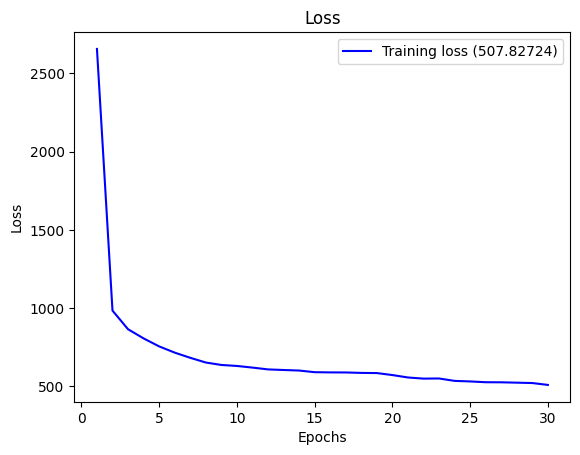

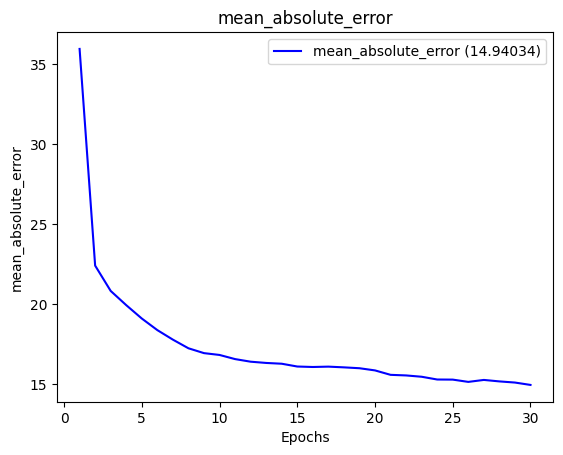

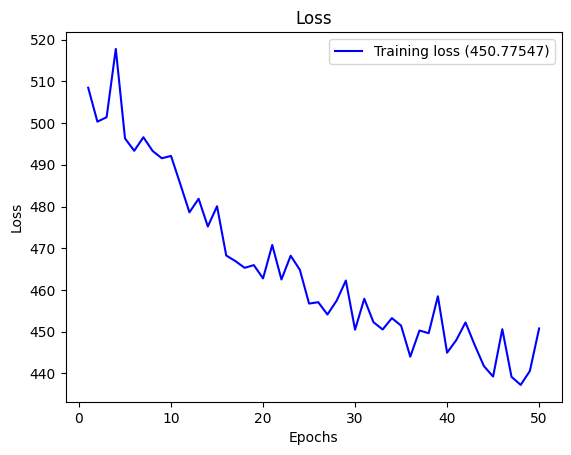

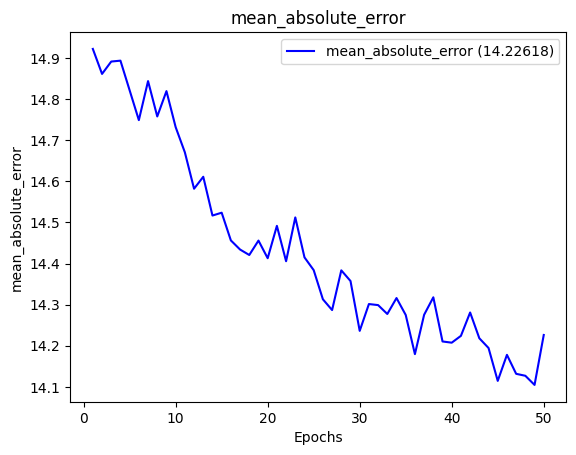

In [79]:
plot_history(history_1)
plot_history(history_2)

In [80]:
df_2 = pd.read_csv("H2.csv")
df_2=df_2.dropna()
test_df,categorical_index_2=convert_to_cat(df_2)
final_x_1_2=pd.DataFrame(test_df).iloc[:,:24]
final_x_2_2=(pd.DataFrame(test_df).iloc[:,25:])
test_x=pd.concat([final_x_1_2, final_x_2_2], axis="columns")
test_y=pd.DataFrame(test_df).iloc[:,24]
print(test_x)


       IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  \
0               0         6             2015                 5   
1               1        88             2015                 5   
2               1        65             2015                 5   
3               1        92             2015                 5   
4               1       100             2015                 5   
...           ...       ...              ...               ...   
79325           0        23             2017                 1   
79326           0       102             2017                 1   
79327           0        34             2017                 1   
79328           0       109             2017                 1   
79329           0       205             2017                 1   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1                     0   
1                         27                      1  

In [81]:
mean=test_x.mean()
standard_deviation=test_x.std()
test_x= (test_x - mean) / standard_deviation
print(test_x)

       IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  \
0       -0.845884 -0.934990        -1.680206         -0.163225   
1        1.182181 -0.195940        -1.680206         -0.163225   
2        1.182181 -0.403235        -1.680206         -0.163225   
3        1.182181 -0.159889        -1.680206         -0.163225   
4        1.182181 -0.087786        -1.680206         -0.163225   
...           ...       ...              ...               ...   
79325   -0.845884 -0.781773         1.180851         -1.290559   
79326   -0.845884 -0.069761         1.180851         -1.290559   
79327   -0.845884 -0.682632         1.180851         -1.290559   
79328   -0.845884 -0.006671         1.180851         -1.290559   
79329   -0.845884  0.858558         1.180851         -1.290559   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                  -0.012955              -1.694036             -0.898704   
1                  -0.012955              -1.694036  

In [82]:
y_pred=model.predict(test_x)
print("pred",y_pred)
print("desired",test_y)

pred [[ 92.14716 ]
 [ 59.722633]
 [ 62.70908 ]
 ...
 [238.53365 ]
 [179.90594 ]
 [195.63853 ]]
desired 0          0.00
1         76.50
2         68.00
3         76.50
4         76.50
          ...  
79325     96.14
79326    225.43
79327    157.71
79328    104.40
79329    151.20
Name: ADR, Length: 79302, dtype: float64


In [83]:
# import csv



# with open('result.csv', 'w') as file:
#     writer = csv.writer(file)
#     writer.writerow(y_pred)
#     writer.writerow
csv_write=pd.concat([pd.DataFrame(y_pred), pd.DataFrame(test_y)], axis="columns")
csv_write.to_csv("./comp.csv")

In [84]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(pd.DataFrame(y_pred), pd.DataFrame(test_y)))
model.evaluate(test_x,test_y)


3222.600473416197
79302/79302 [==============================] - 2s 21us/sample - loss: 3222.6005 - mean_absolute_error: 42.7272


[3222.600520239487, 42.72722]

In [75]:
from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# bestfeatures = SelectKBest(score_func=chi2, k=10)
  
from sklearn.feature_selection import SelectKBest, f_regression
select_reg =  SelectKBest(k=10, score_func=f_regression)
select_reg.fit(final_x, final_y)               
X_train_new = select_reg.transform(final_x)
X_train_new.shape

(40060, 10)

In [38]:
kept_features = pd.DataFrame({'columns': final_x.columns,
                              'Kept': select_reg.get_support()})
kept_features

,columns,Kept
0,IsCanceled,False
1,LeadTime,False
2,ArrivalDateYear,False
3,ArrivalDateMonth,True
4,ArrivalDateWeekNumber,True
5,ArrivalDateDayOfMonth,False
6,StaysInWeekendNights,False
7,StaysInWeekNights,False
8,Adults,True
9,Children,True


In [40]:
print(pd.DataFrame(X_train_new))
print(final_x)

              0         1         2         3         4         5         6  \
0     -0.089831 -0.010058  0.190526 -0.289046 -0.540219 -1.329978 -1.020996   
1     -0.089831 -0.010058  0.190526 -0.289046 -0.540219 -1.329978 -1.020996   
2     -0.089831 -0.010058 -1.243607 -0.289046 -0.540219 -1.329978 -1.020996   
3     -0.089831 -0.010058 -1.243607 -0.289046 -0.540219 -2.077689 -2.615085   
4     -0.089831 -0.010058  0.190526 -0.289046 -0.540219  0.913156  0.573092   
...         ...       ...       ...       ...       ...       ...       ...   
40055 -1.232159  0.561149  0.190526  1.957160 -0.540219  0.165445  0.573092   
40056 -1.232159  0.561149  0.190526 -0.289046 -0.540219 -1.329978 -1.020996   
40057 -1.232159  0.561149  0.190526 -0.289046 -0.540219 -1.329978 -1.020996   
40058 -1.232159  0.561149  0.190526 -0.289046  1.447034  0.165445  0.573092   
40059 -1.232159  0.561149  0.190526 -0.289046  1.447034  0.165445  0.573092   

              7         8         9  
0      0.2039